In [1]:
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
import nltk
import os
# from tqdm import tqdm

In [2]:
def importData(publication):
    
    filePath = os.getcwd()+'/models/publicationsCbow/'+publication +'/biasresults.txt'
#     filePath = os.getcwd()+'models/'+publication+'/biasresults.txt'
    
    file = open(filePath,'r')
    
    politicalEntities = []
    pos = []
    neu = []
    neg = []
    
    for line in file:
        components = (line.strip()).split(':')
        if components[0].strip()=='Political Entity'or components[0].strip()=='Publication' or components[0].strip()==publication or '--' in components[0]:
            continue
            
        if len(components) < 4:
            politicalEntities.append(components[0].strip())
            pos.append(float(0))
            neu.append(float(0))
            neg.append(float(0))
        else:
            politicalEntities.append(components[0].strip())
            pos.append(float(components[1].strip()))
            neu.append(float(components[2].strip()))
            neg.append(float(components[3].strip()))

    
    return [politicalEntities,pos,neu,neg]  

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotIndividualBias(publication):

    data = importData(publication)
    
    # Data 
    x = data[0]
    y1 = data[1]
    y2 = data[2]
    y3 = data[3]
    
    # Positive and Negative sentiment plot
    plt.figure(figsize=(20,5))
    plt.xticks(rotation=90)
    
    plt.title(publication + "\nSentiment Plot")
    plt.xlabel('Political Entities') 
    plt.ylabel('Magnitude of Sentiment') 
    
    plt.plot(x, y1,'r-', alpha=0.5, linestyle='--', marker='.', color='blue', label="Positive Sentiment")
    plt.plot(x, y3,'r-', alpha=0.5, linestyle='--', marker='.', color='green', label="Negative Sentiment")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    plt.tight_layout()
    plt.grid(linestyle='-', linewidth='0.5', alpha=0.3 ,color='black')

    plt.savefig(os.getcwd()+'/models/publicationsCbow/'+publication +'/posNeg.png', dpi=600)
    plt.show()
    
    # Neutral sentiment plot 
    plt.figure(figsize=(20,5))
    plt.xticks(rotation=90)
    
    plt.plot(x, y2,'r-', alpha=0.5, linestyle='--', marker='.', color='blue')
    
    plt.MarkerFaceAlpha = 0.1
    plt.title(publication + "\nNeutral Sentiment Plot")
    plt.xlabel('Political Entities') 
    plt.ylabel('Magnitude of Neutral Sentiment')
    
    plt.tight_layout()
    plt.grid(linestyle='-', linewidth='0.5', alpha=0.3 ,color='black')

    plt.savefig(os.getcwd()+'/models/publicationsCbow/'+publication +'/neu.png', dpi=600)
    plt.show()
    
    # Subracted sentiment plot 
    plt.figure(figsize=(20,5))
    plt.xticks(rotation=90)
    
    subValues = []
    zippedSent = zip(y1, y3)
    for y1, y3 in zippedSent:
        subValues.append(y1-y3)
    
    plt.plot(x, subValues,'r-', alpha=0.5, linestyle='--', marker='.', color='green')
    
    plt.MarkerFaceAlpha = 0.1
    plt.title(publication + "\nOverall Sentiment Plot")
    plt.xlabel('Political Entities') 
    plt.ylabel('Overall Sentiment\n(Positive Sentiment - Negative Sentiment)')
    
    plt.tight_layout()
    plt.grid(linestyle='-', linewidth='0.5', alpha=0.3 ,color='black')

    plt.savefig(os.getcwd()+'/models/publicationsCbow/'+publication +'/sub.png', dpi=600)
    plt.show()

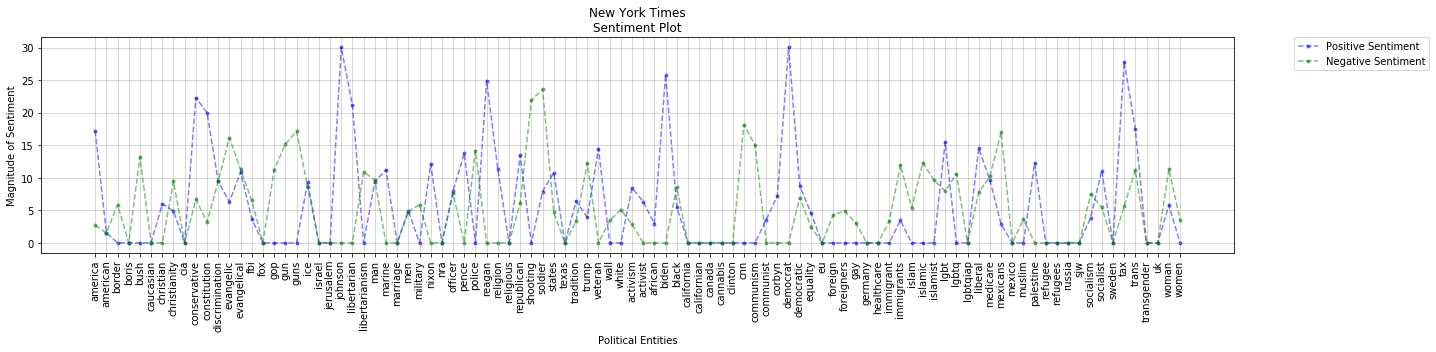

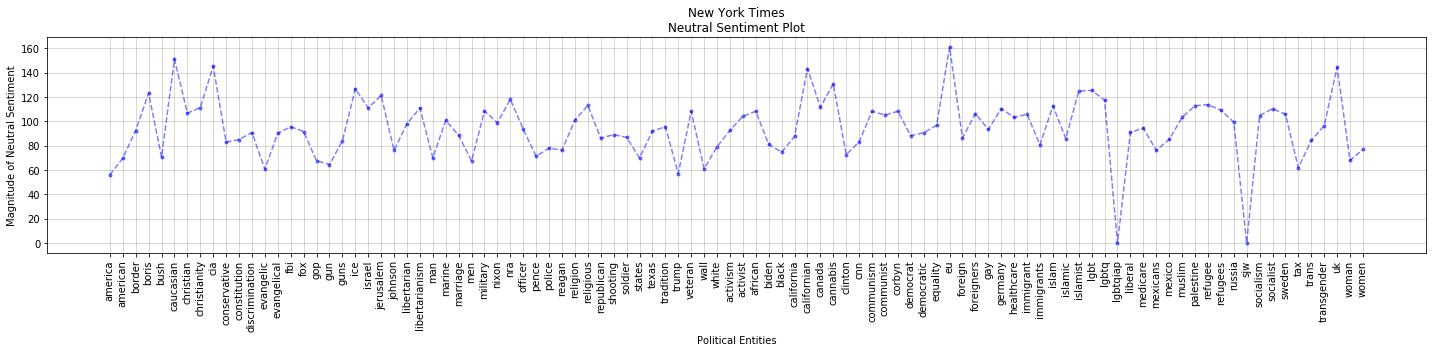

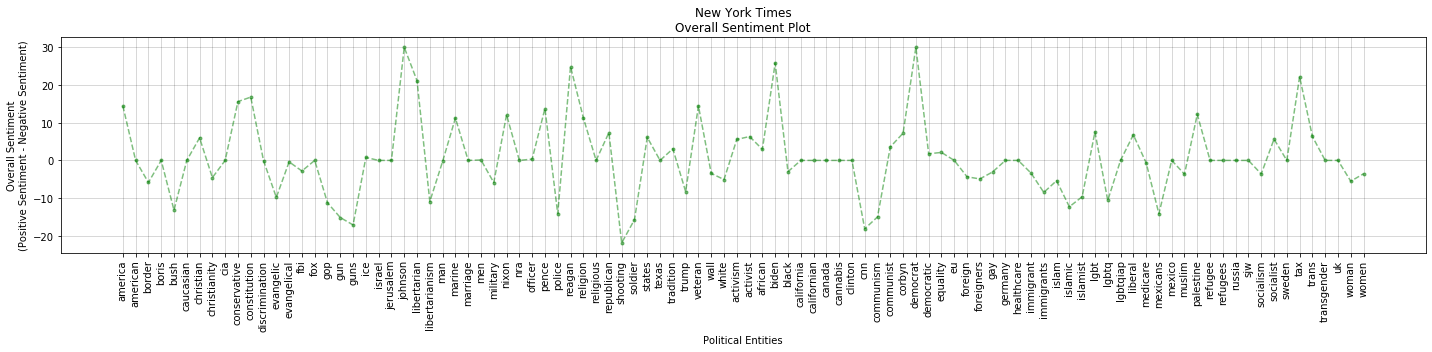

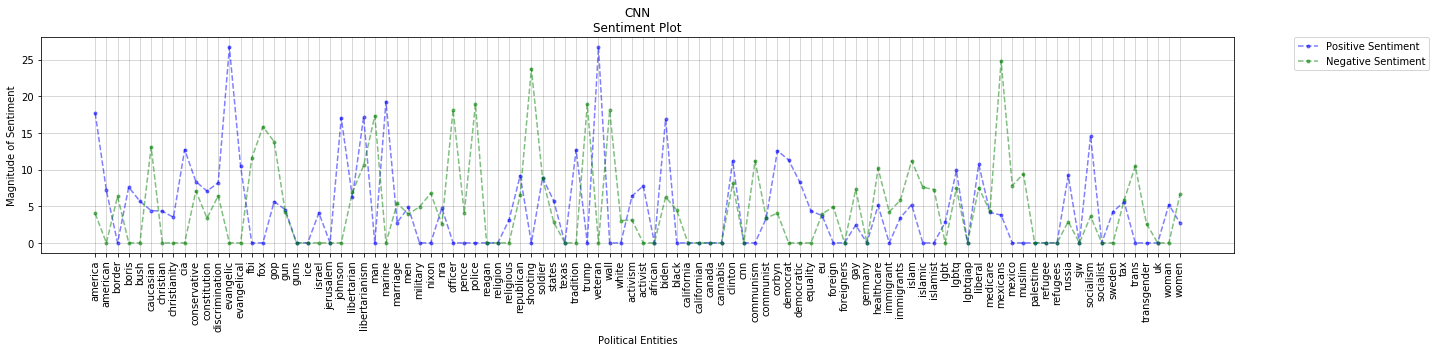

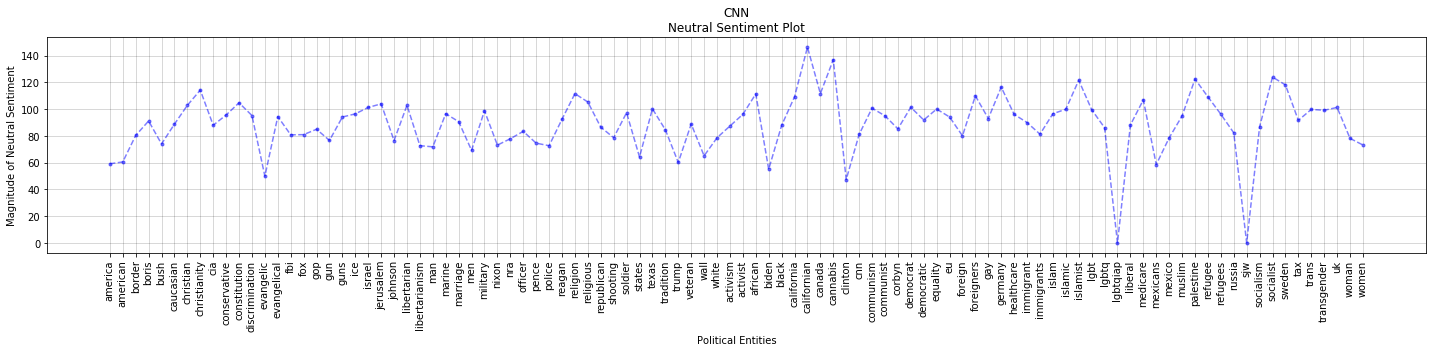

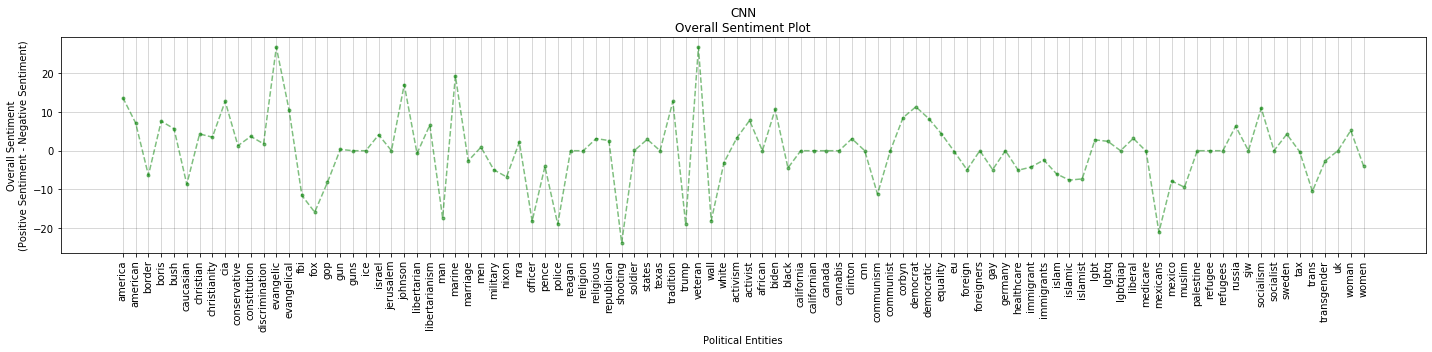

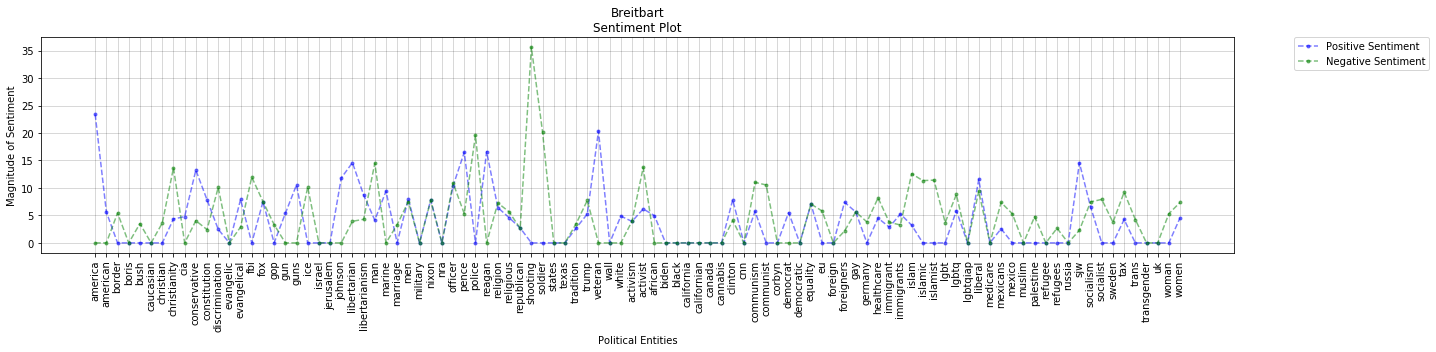

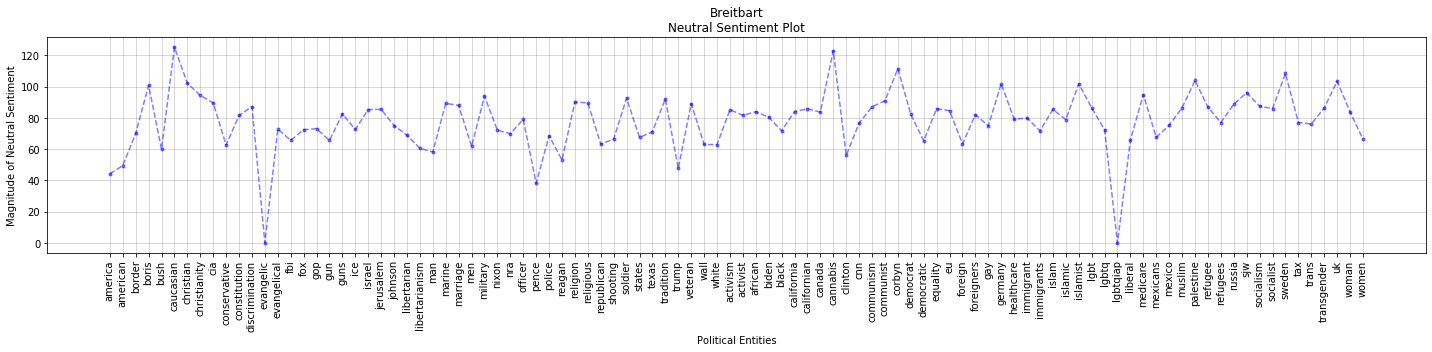

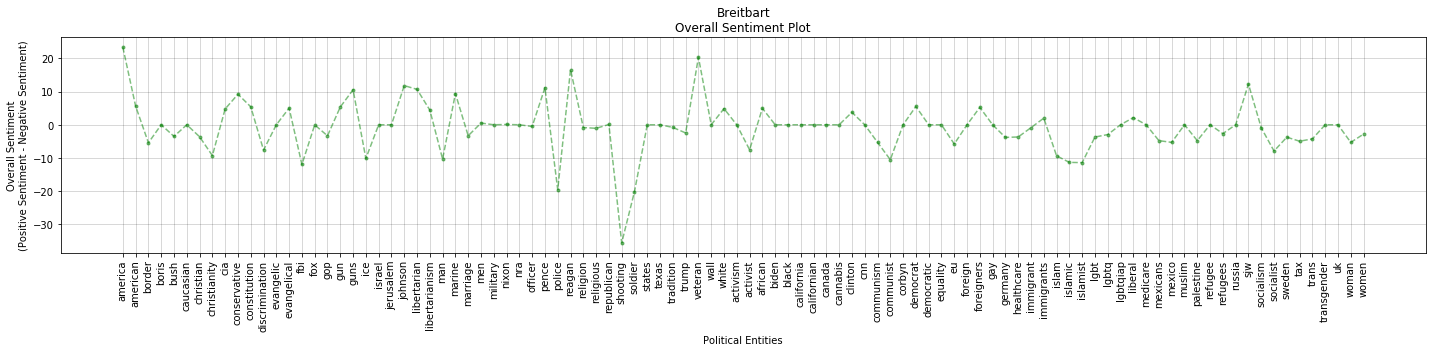

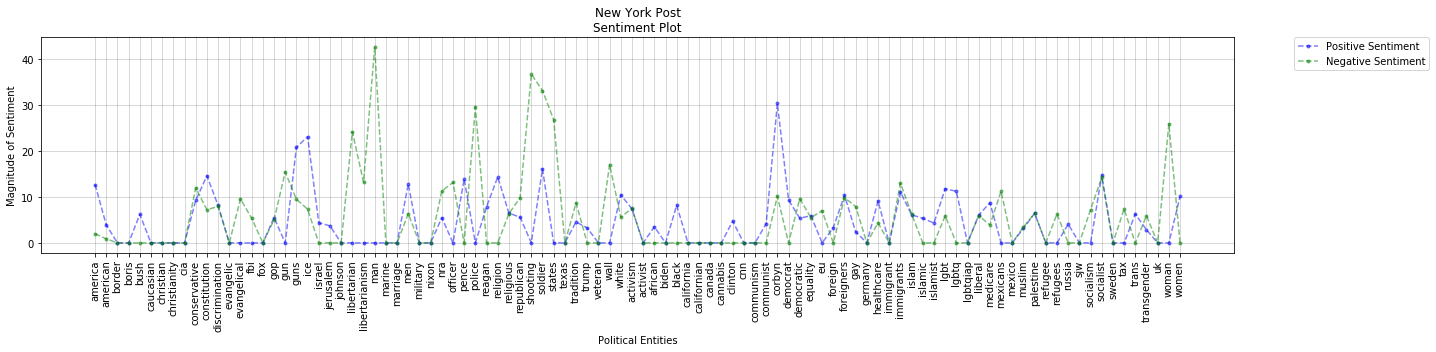

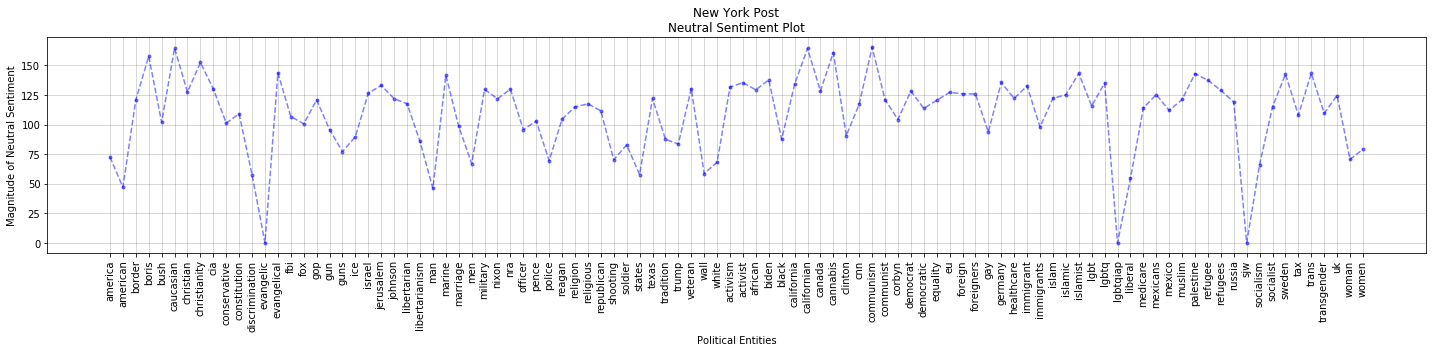

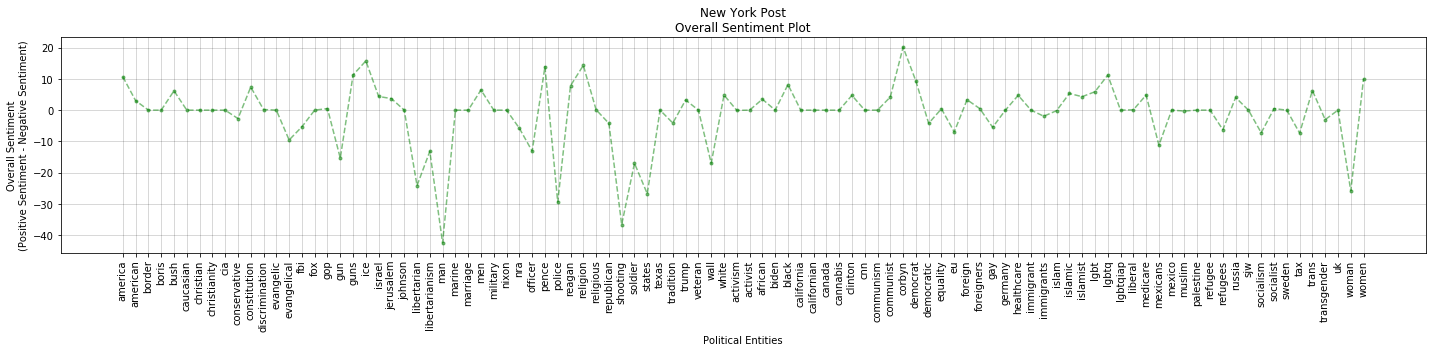

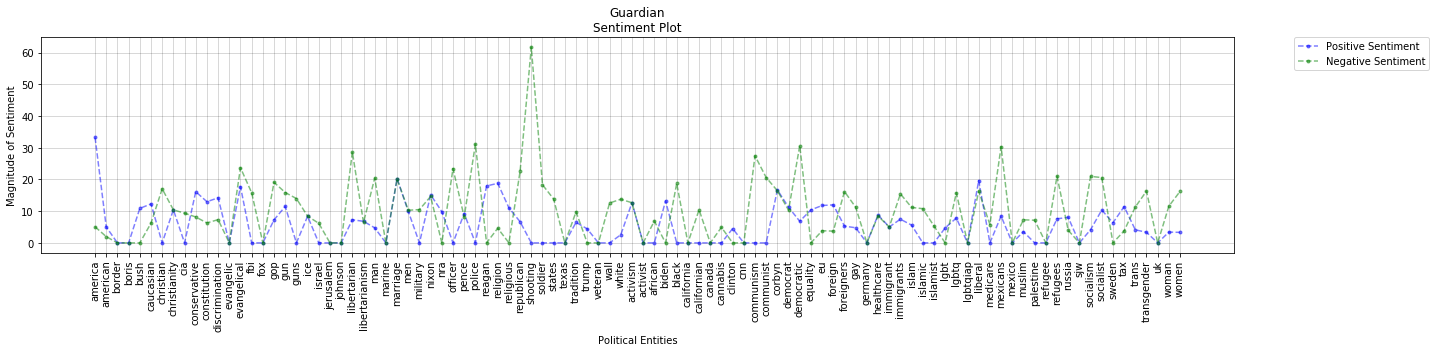

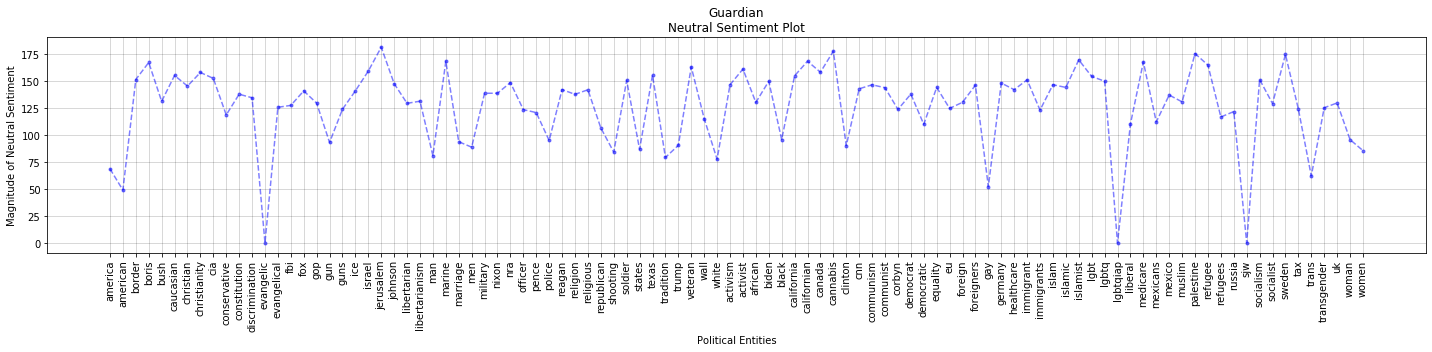

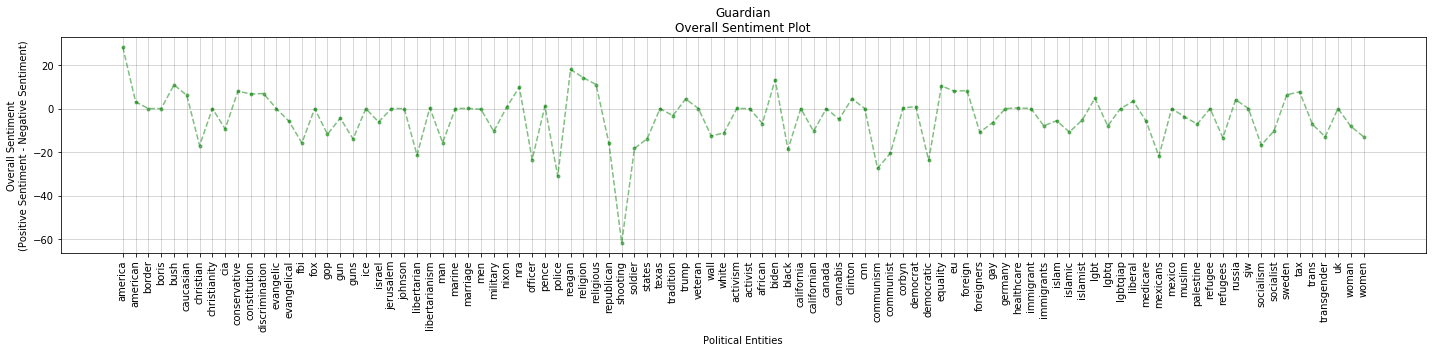

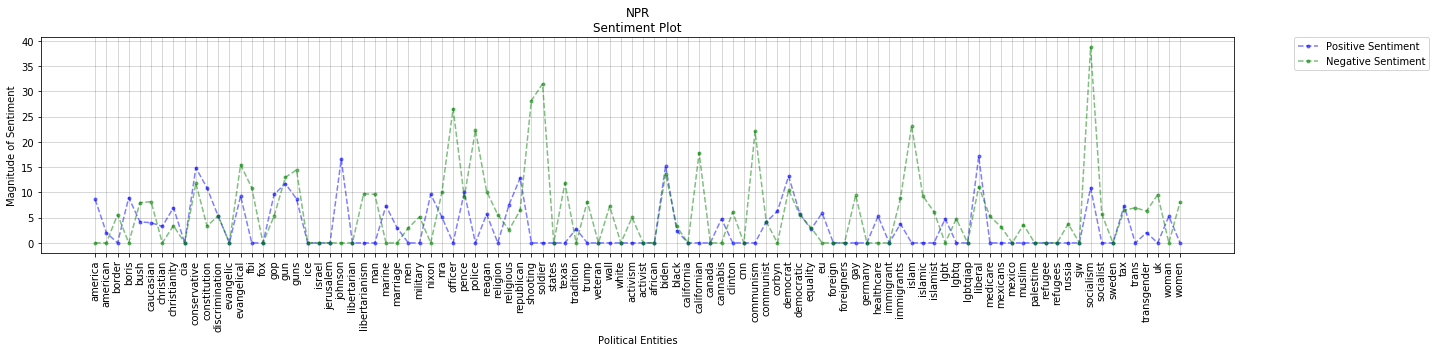

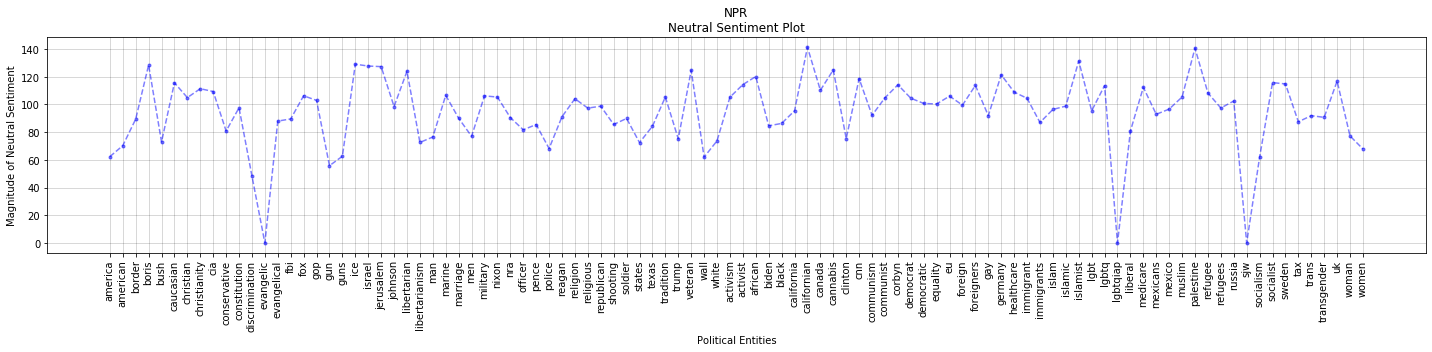

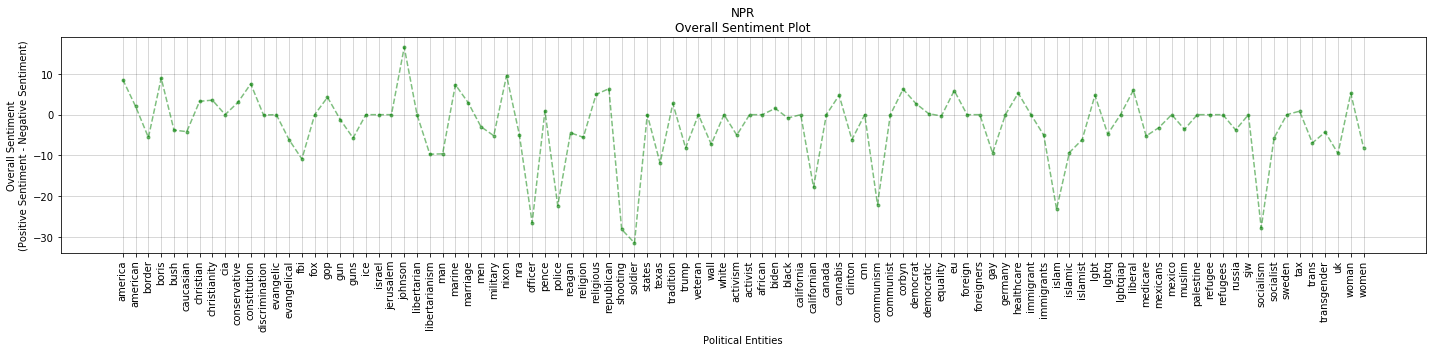

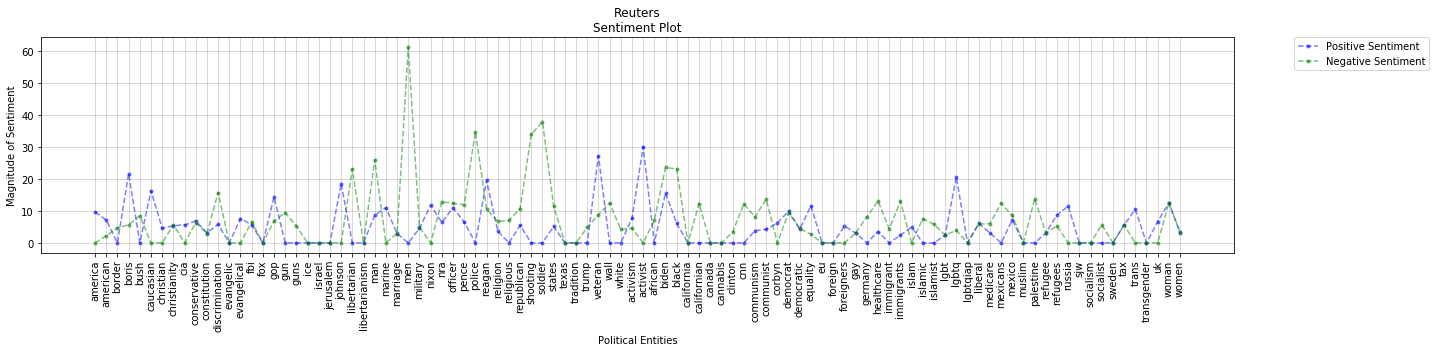

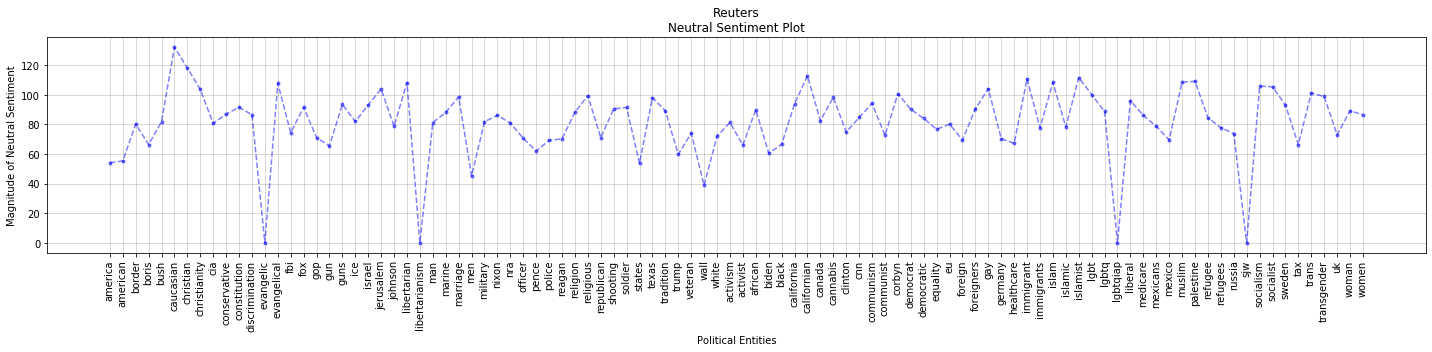

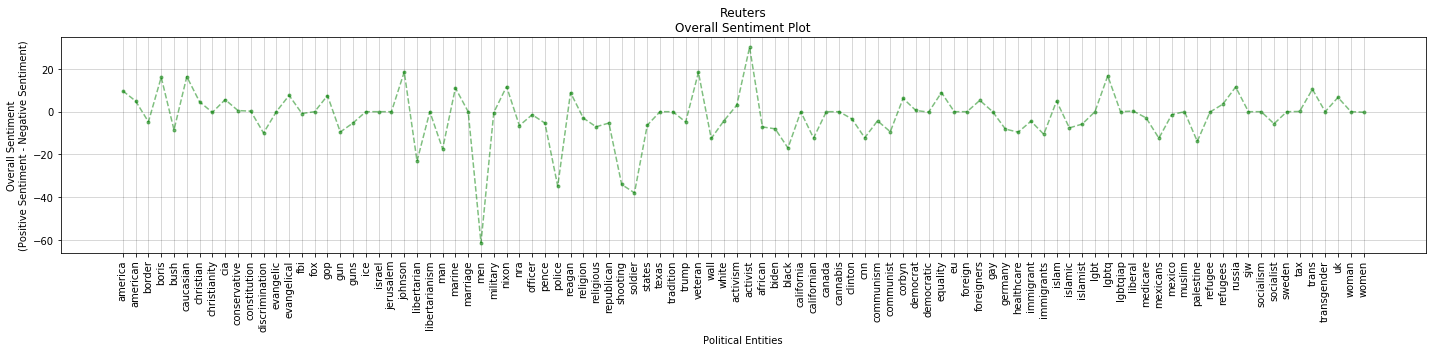

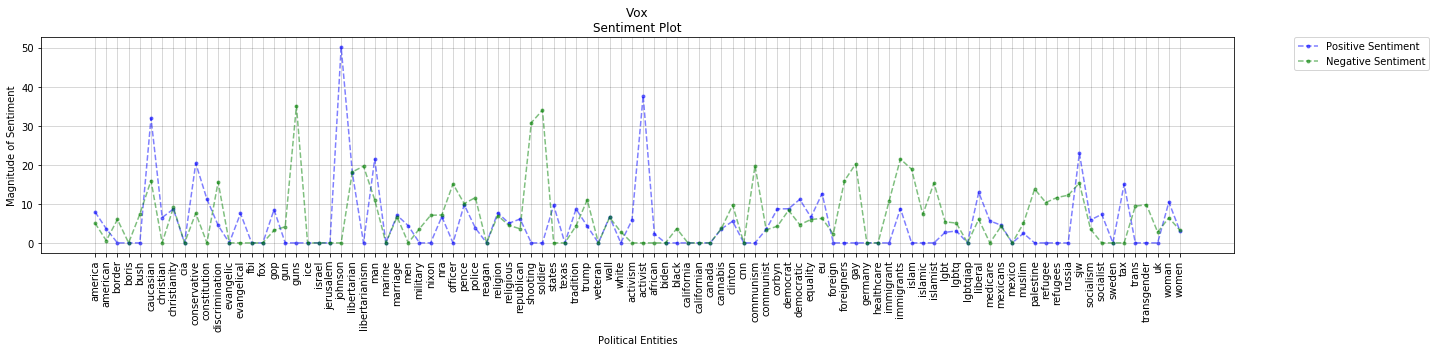

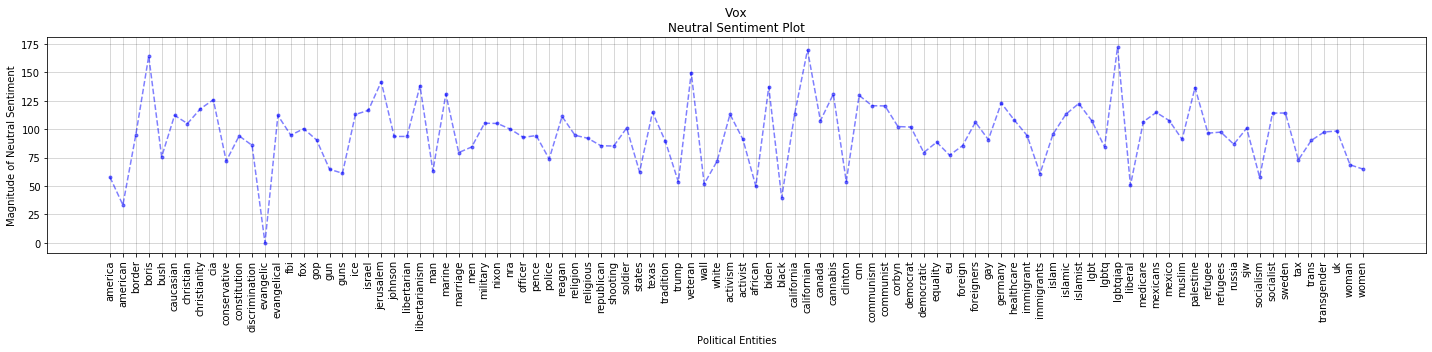

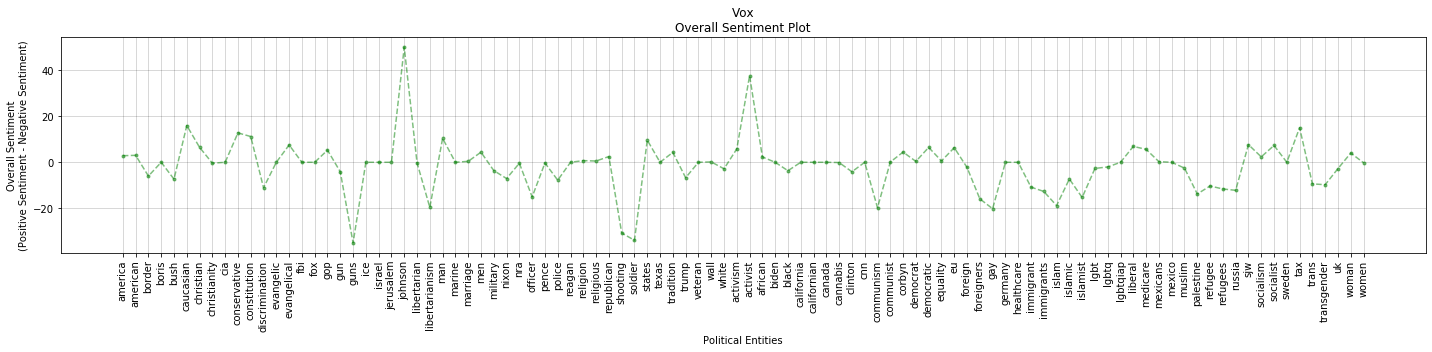

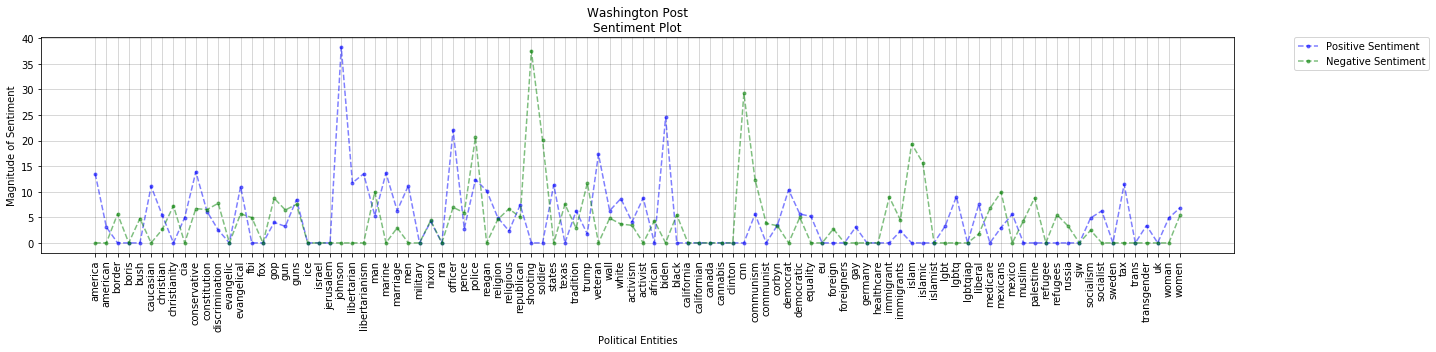

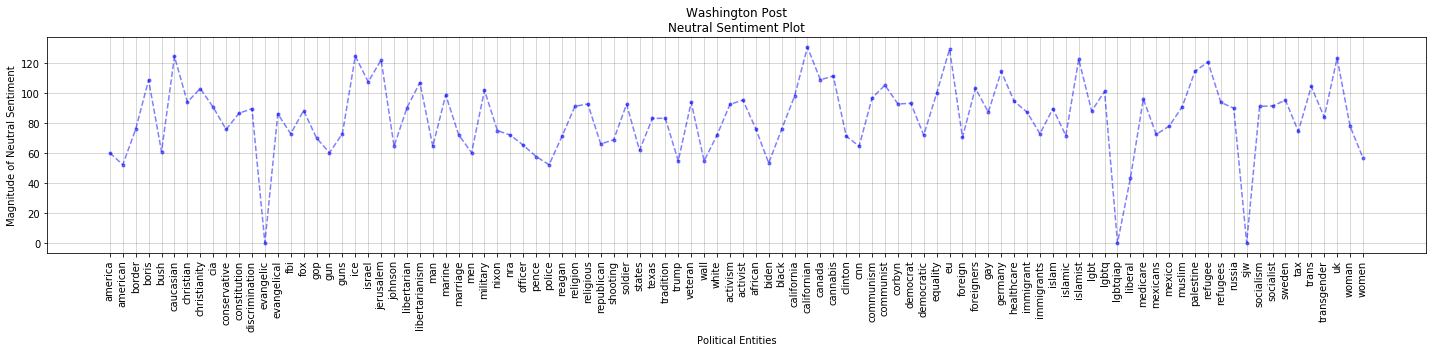

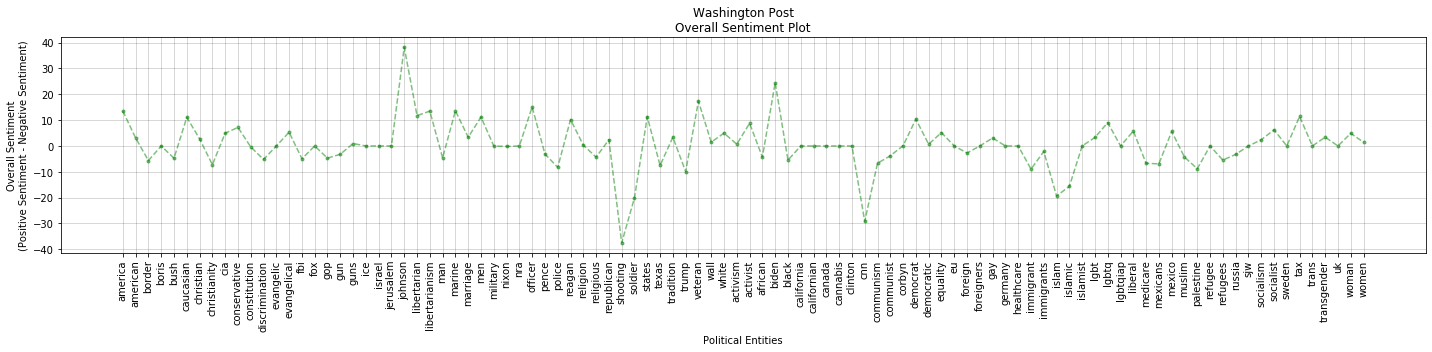

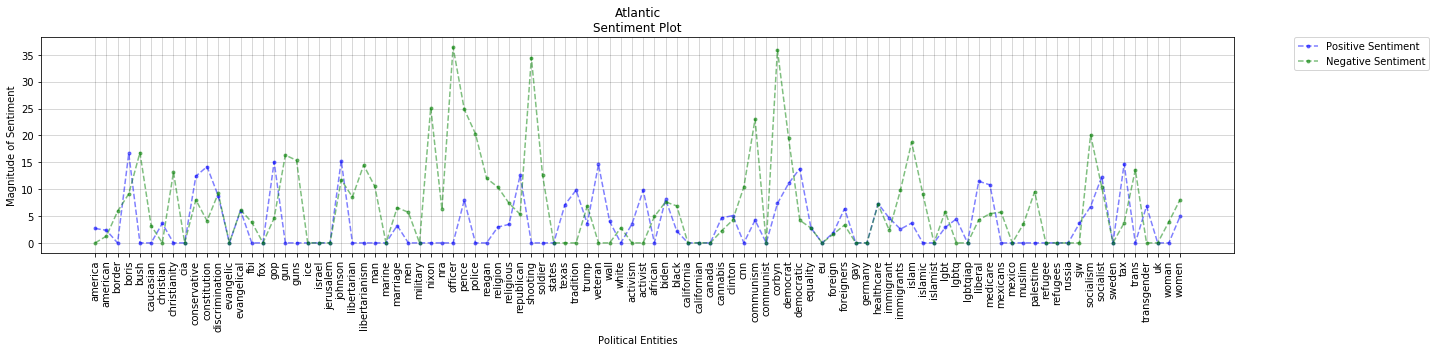

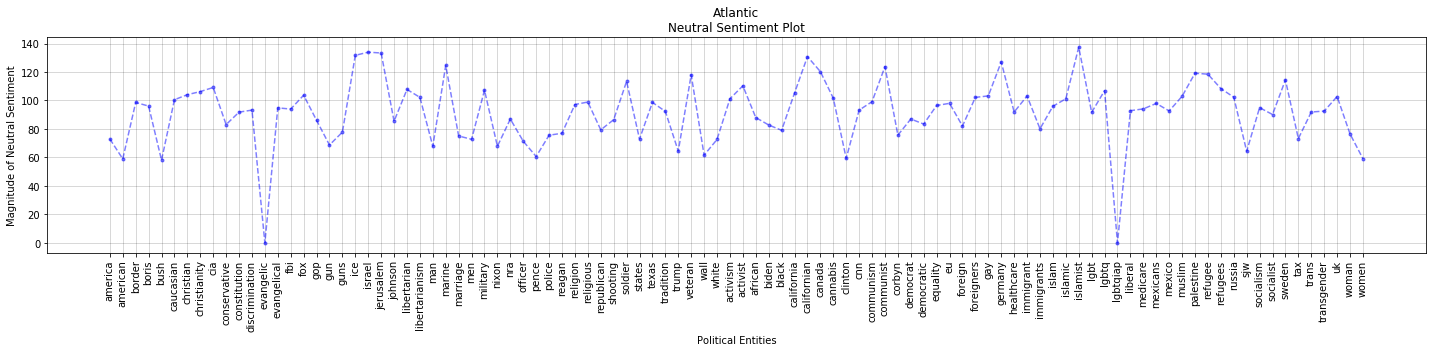

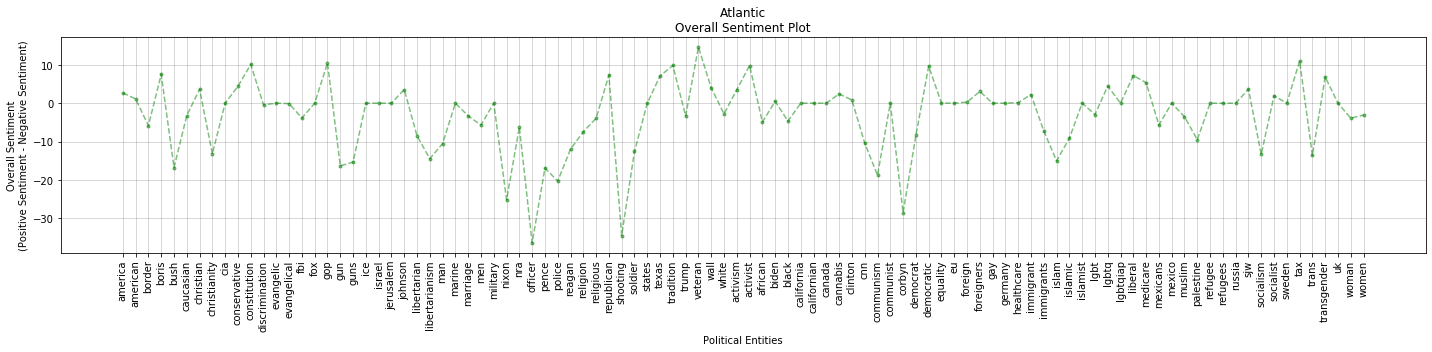

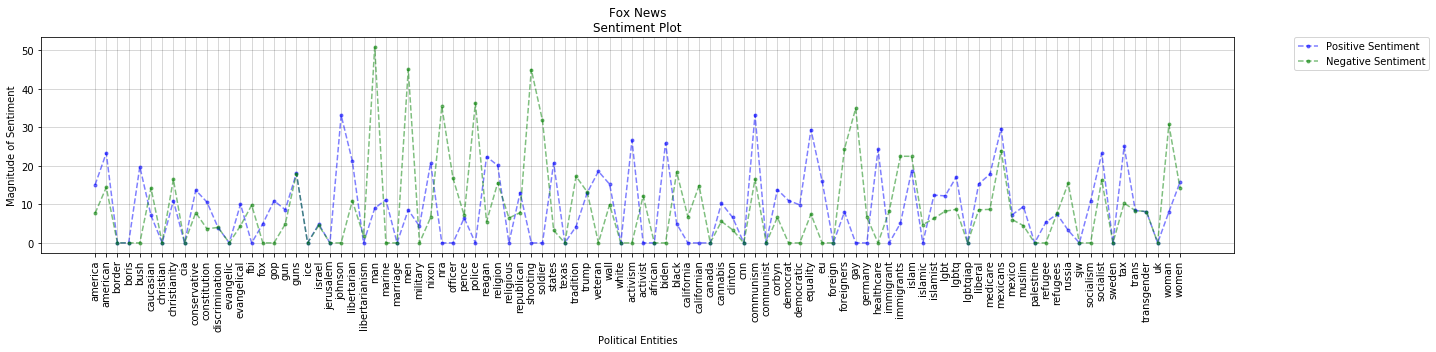

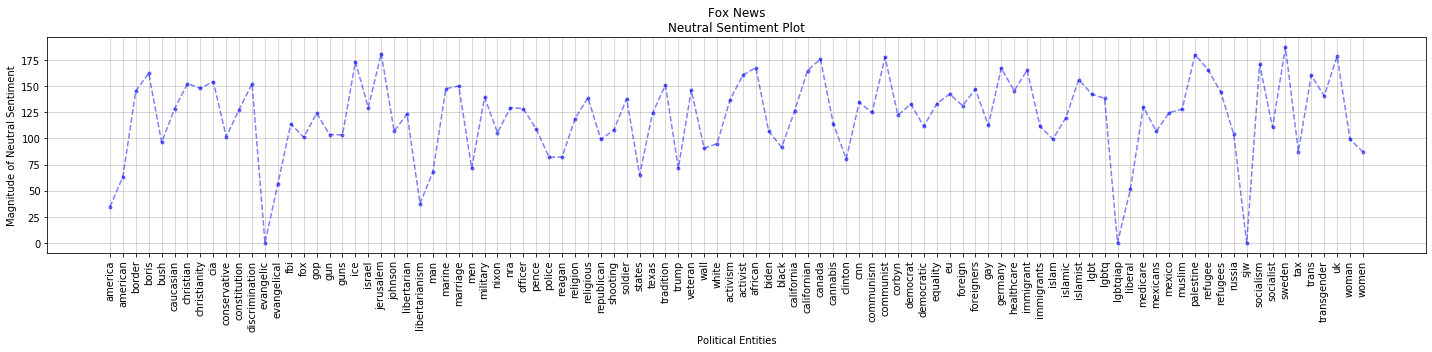

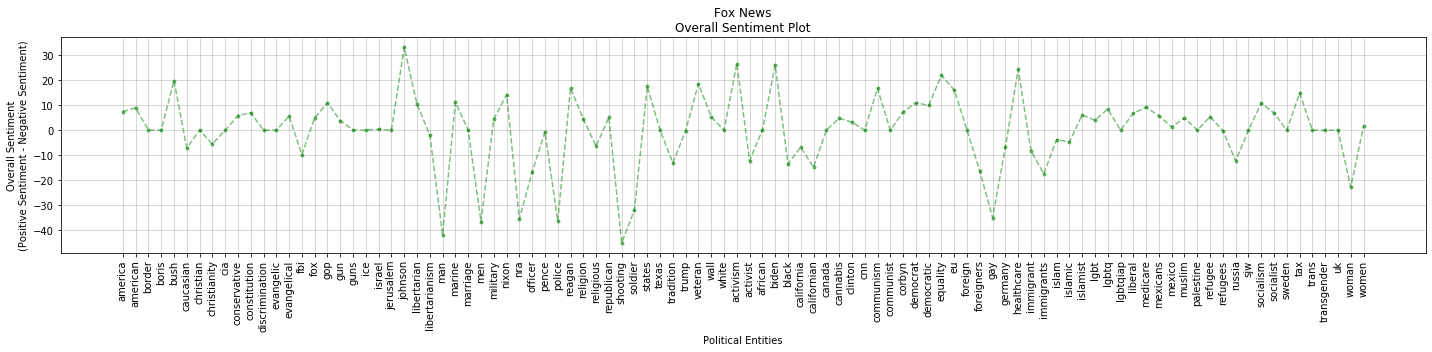

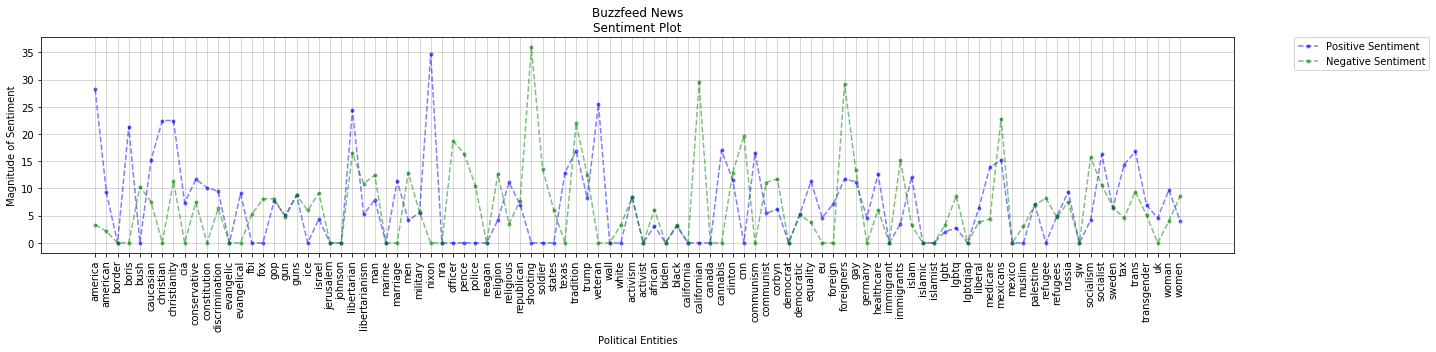

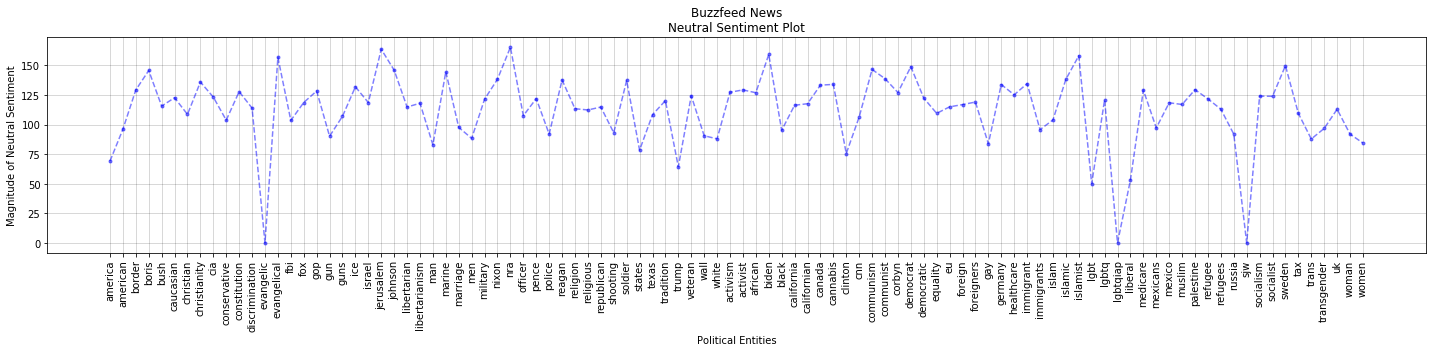

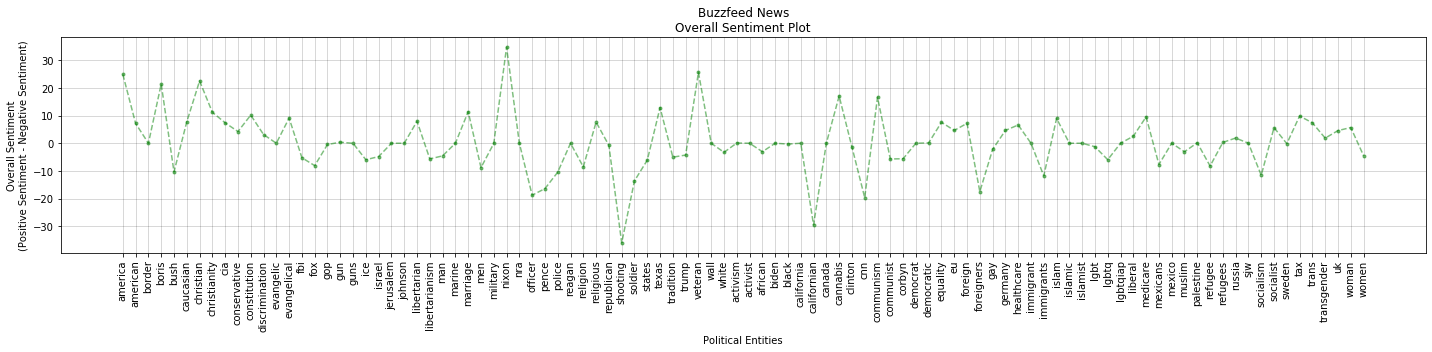

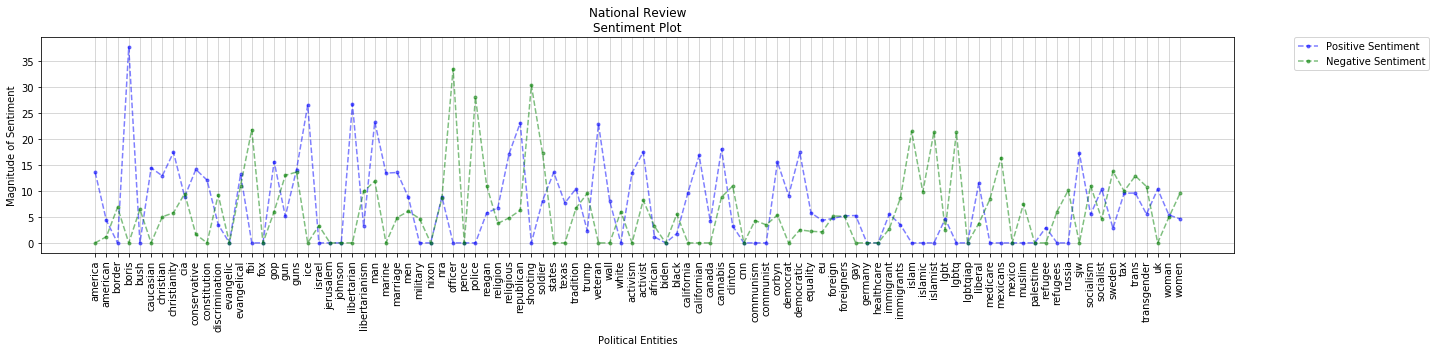

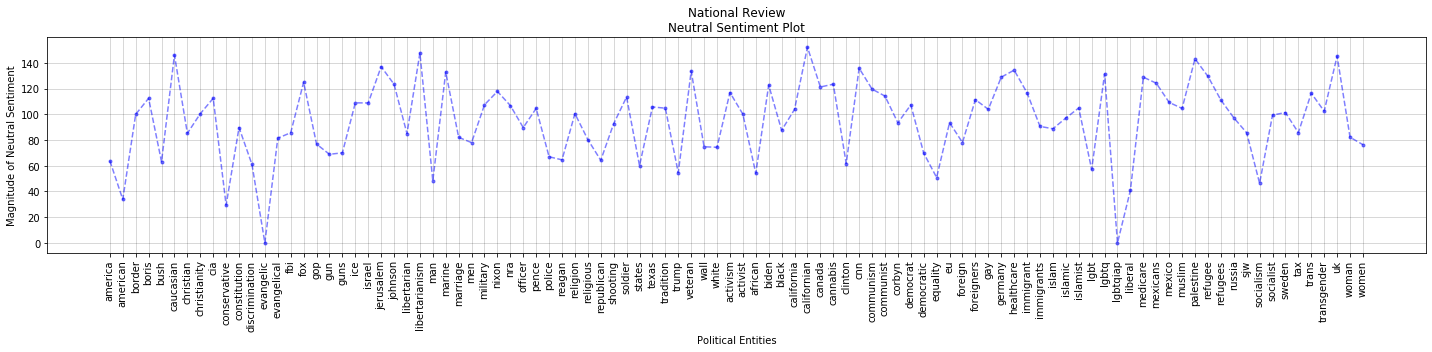

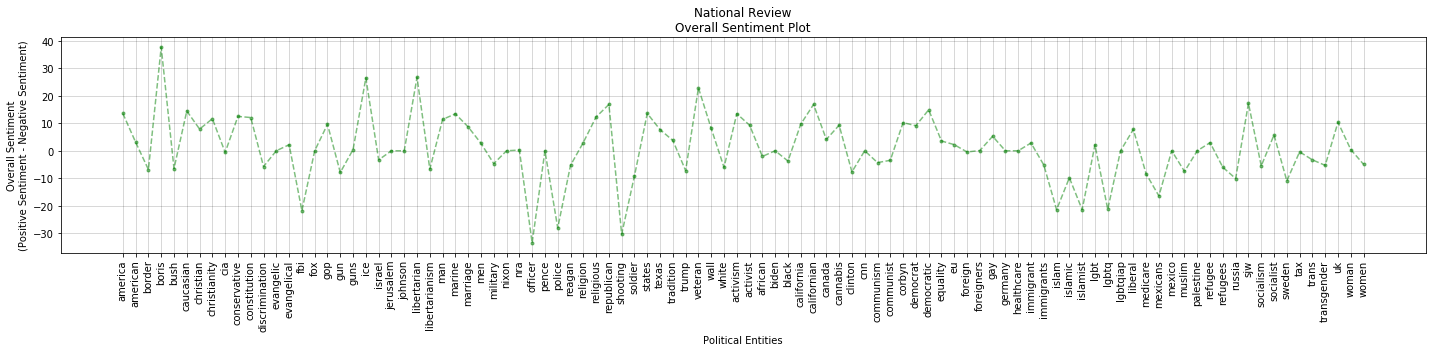

In [4]:
publications = ['New York Times', 'CNN', 'Breitbart', 'New York Post', 'Guardian', 'NPR', 'Reuters', 'Vox', 'Washington Post', 'Atlantic', 'Fox News', 'Buzzfeed News', 'National Review']

for i in publications:
    plotIndividualBias(i)